# Model 1

XGB Boost Model

In [1]:
! pip install -r requirements.txt

In [2]:

# basics
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_palette('magma')
from sklearn.model_selection import train_test_split

# warnings
import warnings
warnings.filterwarnings('ignore')

RSEED = 42

# EDA

In [3]:
# load training data
df_raw = pd.read_csv('data/Train.csv')
df = df_raw

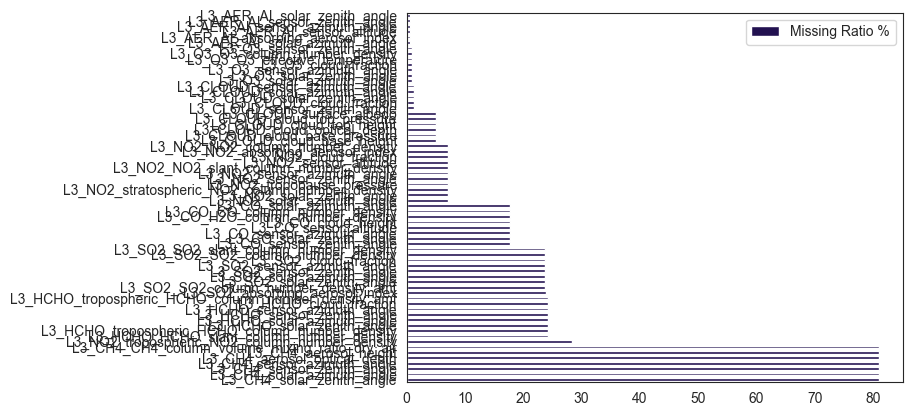

In [6]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)
plot_width, plot_height = (15,15)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['ytick.labelsize'] = 9

In [7]:
# drop columns with more than 50% missing values
check_ch4 = [col for col in df.columns if 'CH4' in col]
df.drop(columns=check_ch4, axis=1, inplace=True)

In [8]:
df.drop(columns= ['Place_ID', 'Place_ID X Date'], axis=1, inplace=True)

In [9]:
df.shape

(30557, 73)

In [10]:
# Convert to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Create integer column for weekends
df["IsWeek"] = (df["Date"].dt.weekday < 5).astype(int)

In [11]:
df.drop(columns=['Date', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1, inplace=True)

In [12]:
df.head(5)

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,IsWeek
0,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,...,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1
1,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,...,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1
2,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,...,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977,0
3,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,...,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,0
4,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,...,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694,1


In [13]:
! pip install missingno
import missingno as msno

<Axes: >

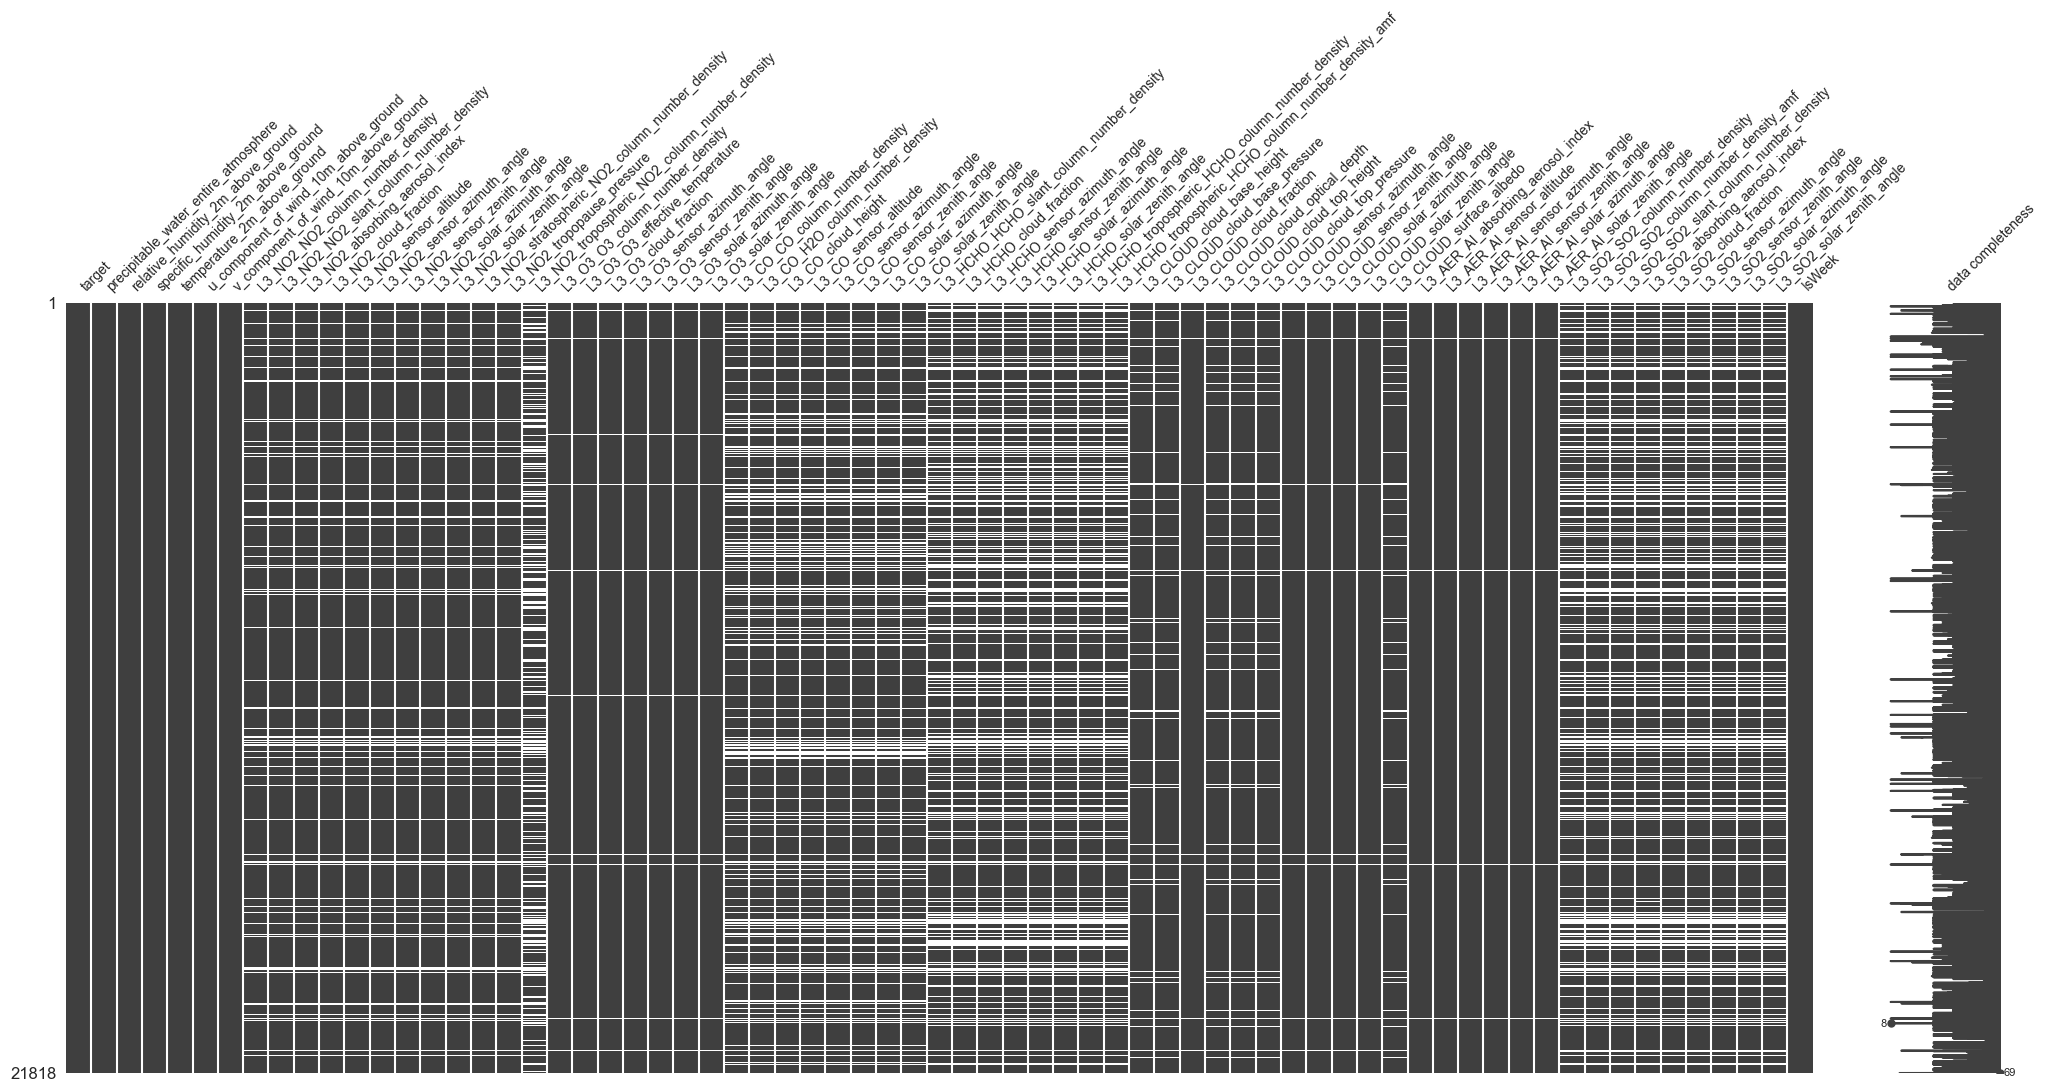

In [13]:
msno.matrix(df.query('IsWeek == 1'), fontsize=10,labels=True)

<Axes: >

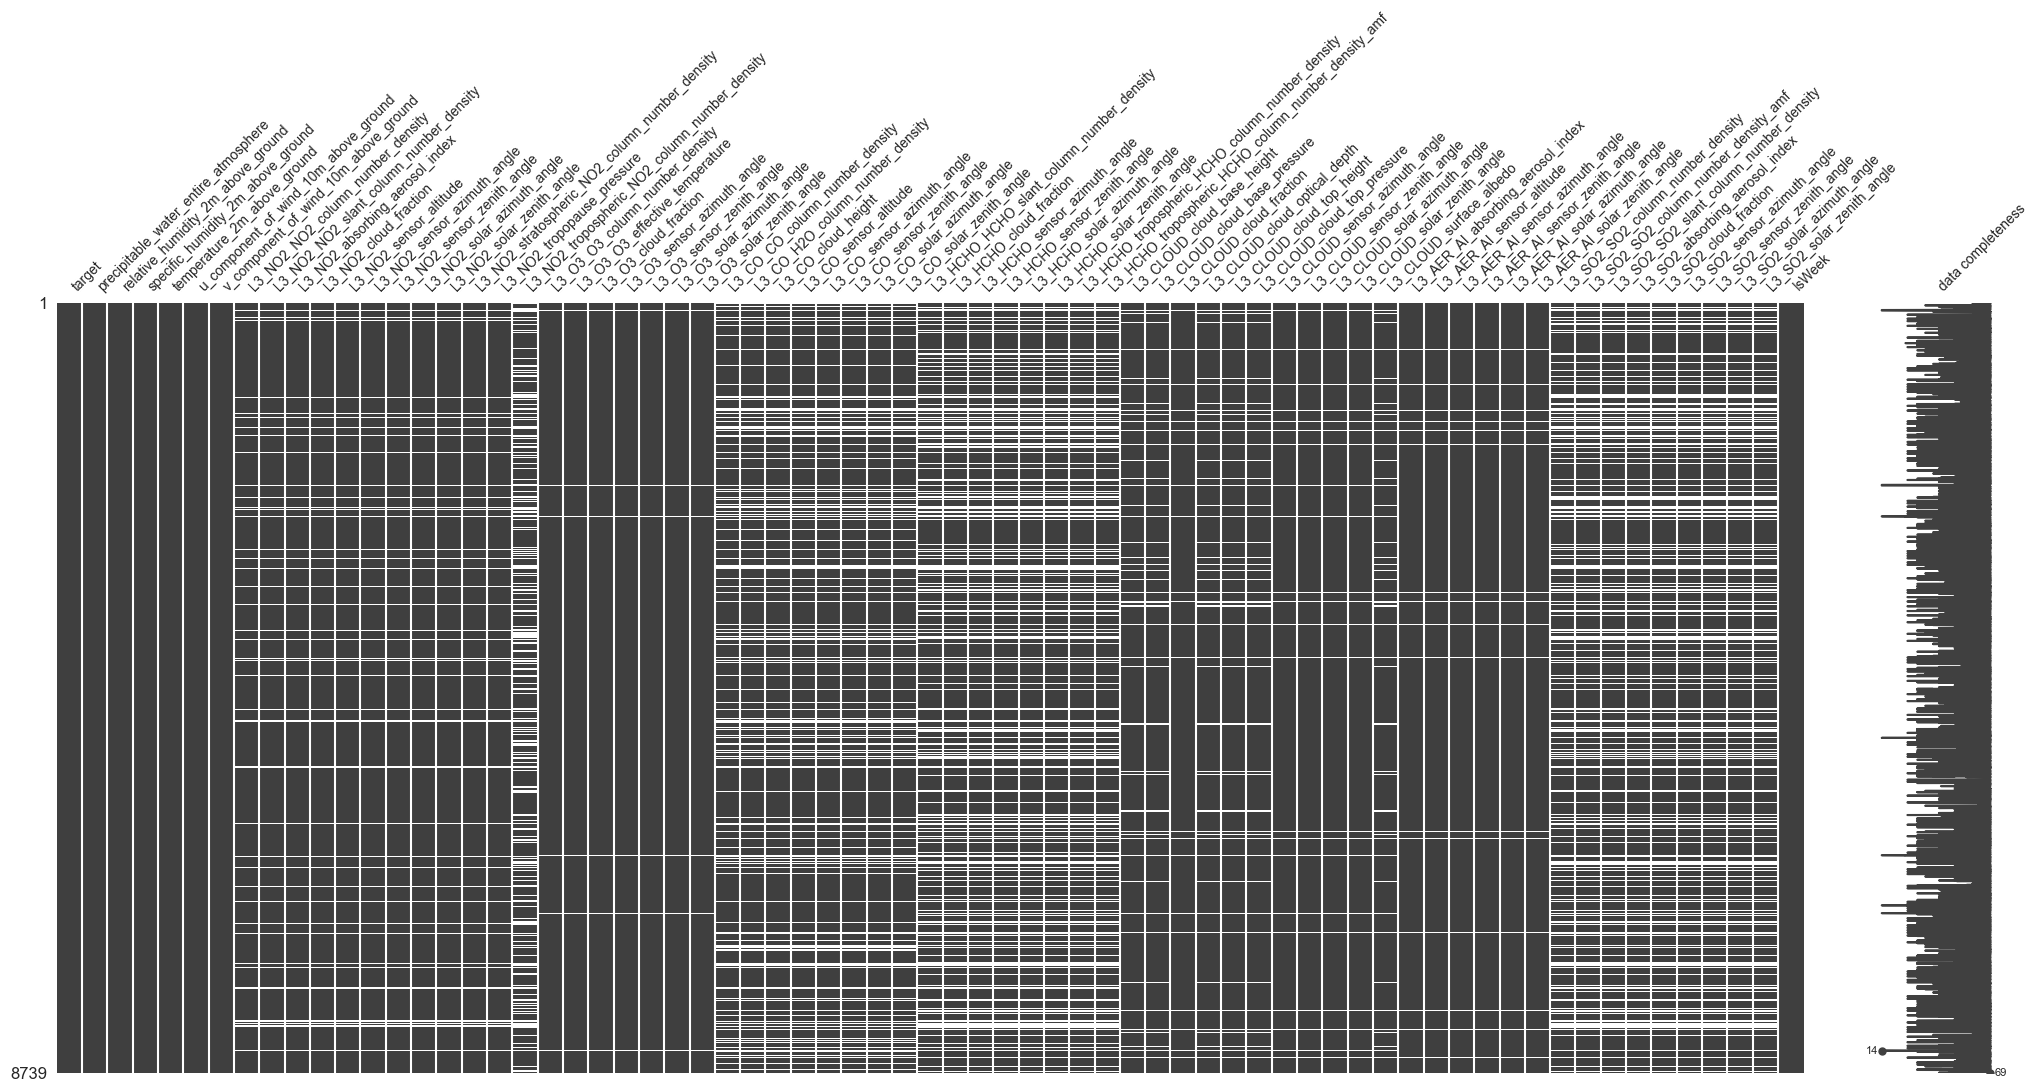

In [14]:
msno.matrix(df.query('IsWeek == 0'), fontsize=10,labels=True)

In [15]:
variables_list = [
    "L3_NO2_NO2_column_number_density",
    "L3_NO2_NO2_slant_column_number_density",
    "L3_NO2_sensor_altitude",
    "L3_NO2_tropopause_pressure",
    "L3_NO2_solar_zenith_angle",
    "L3_SO2_SO2_column_number_density",
    "L3_SO2_SO2_column_number_density_amf",
    "L3_SO2_SO2_slant_column_number_density",
    "L3_SO2_solar_zenith_angle",
    "L3_O3_O3_column_number_density",
    "L3_O3_O3_effective_temperature",
    "L3_O3_solar_zenith_angle",
    "L3_CO_CO_column_number_density",
    "L3_CO_sensor_altitude",
    "L3_CO_solar_zenith_angle",
    "L3_HCHO_solar_zenith_angle",
    "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
]

In [16]:
df[variables_list].replace(0, np.nan, inplace=True)


<Axes: >

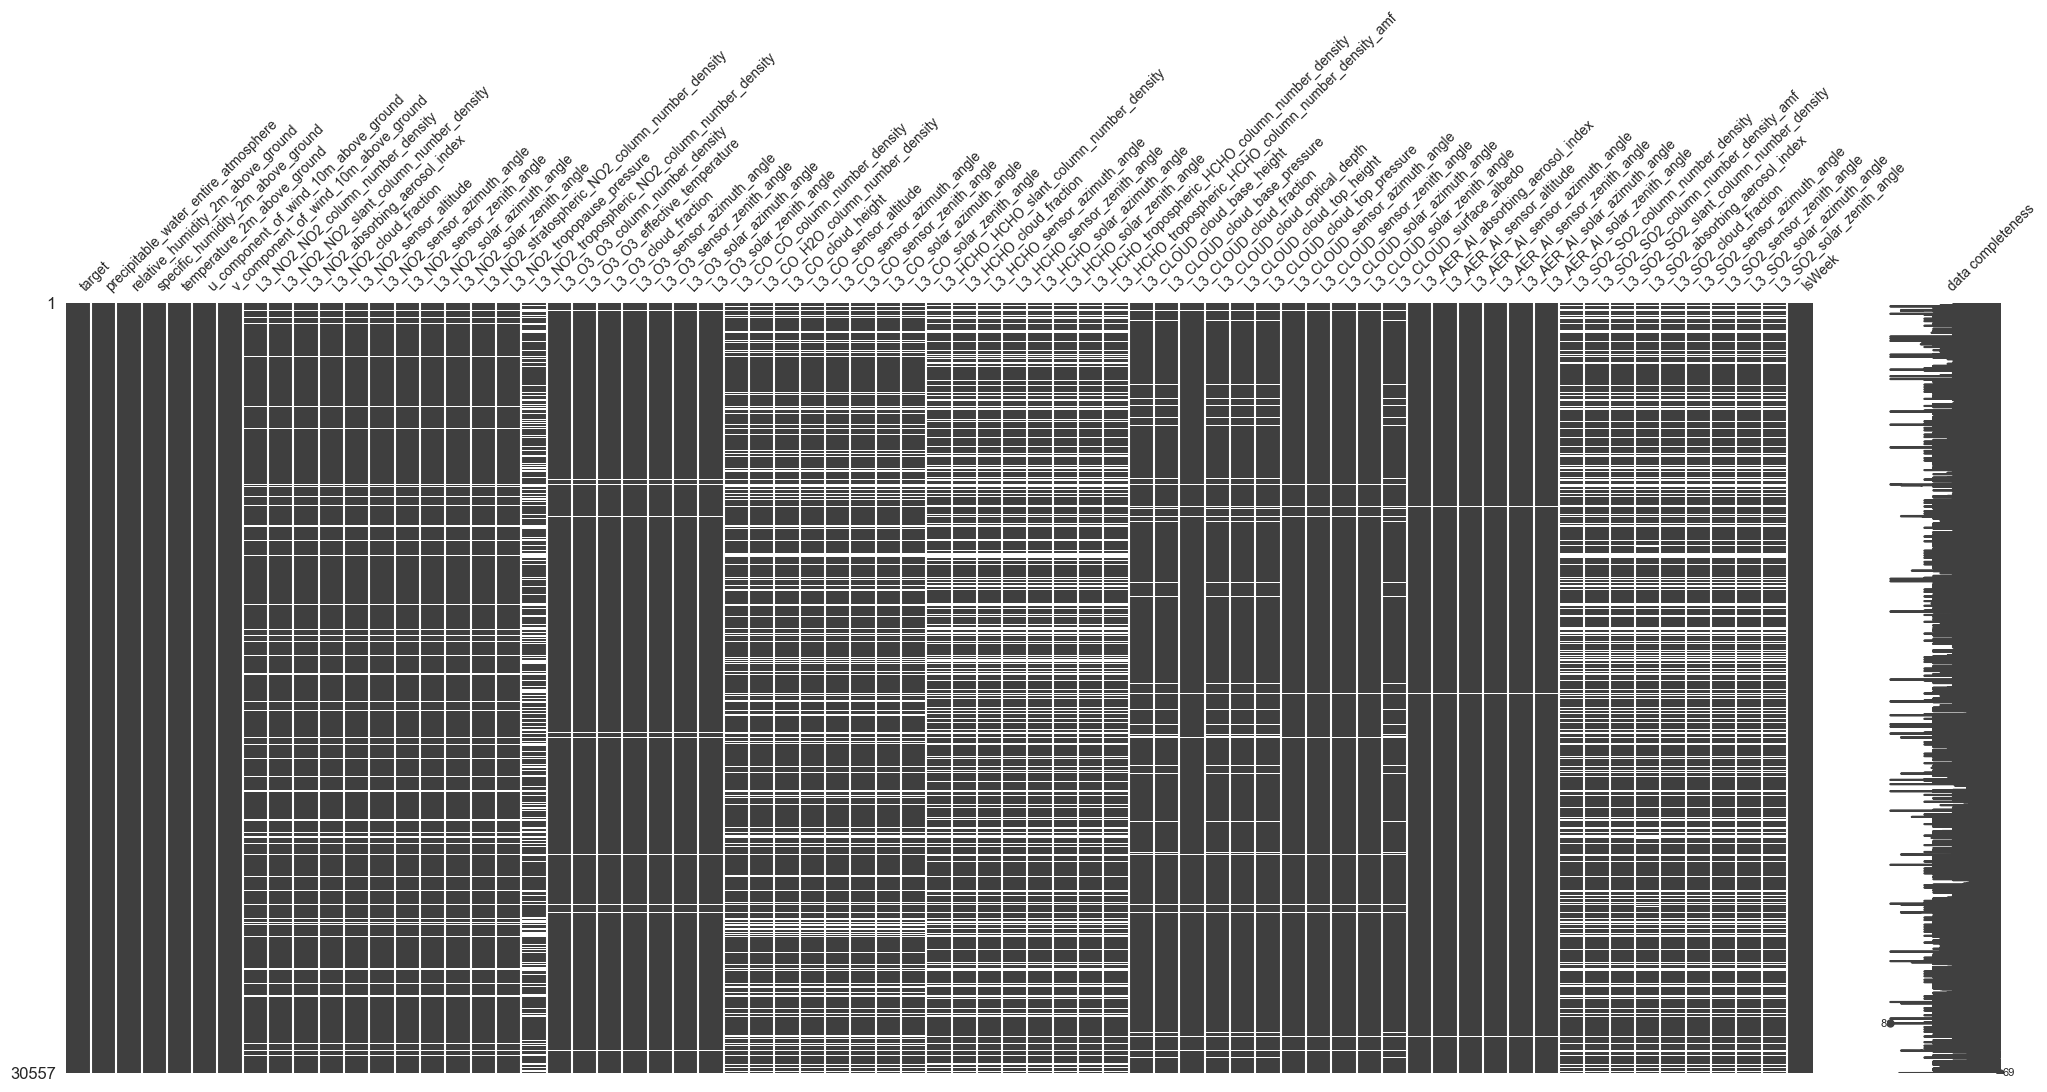

In [17]:
msno.matrix(df, fontsize=10,labels=True)

In [18]:
df.head()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,IsWeek
0,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,...,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1
1,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,...,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1
2,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,...,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977,0
3,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,...,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,0
4,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,...,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694,1


In [19]:
from xgboost import XGBRegressor

In [20]:
df.describe()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,IsWeek
count,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,28368.000000,28368.000000,28368.000000,...,23320.000000,23320.000000,23320.000000,23249.000000,23320.000000,23320.000000,23320.000000,23320.000000,23320.000000,30557.000000
mean,61.148045,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093982,...,0.000113,0.429221,0.000032,-1.944519,0.213883,-13.667626,35.590916,-123.697777,46.533951,0.714010
std,46.861309,10.688573,18.807884,0.003787,9.343226,2.707990,2.641924,0.000094,0.000109,0.610955,...,0.000899,0.252026,0.000167,0.707915,0.157966,75.951317,18.955228,71.916036,14.594267,0.451892
min,1.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,-15.023647,-0.000051,0.000000,-3.941742,...,-0.038756,0.000000,-0.004309,-4.833706,0.000000,-111.997123,0.000000,-179.880630,0.000000,0.000000
25%,25.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,-1.415701,0.000056,0.000122,-1.514681,...,-0.000107,0.251275,-0.000043,-2.372976,0.076872,-97.650684,19.451524,-165.882624,36.693094,0.000000
50%,50.000000,12.200000,74.099998,0.004912,8.478424,0.222092,0.012847,0.000075,0.000150,-1.168333,...,0.000056,0.377935,0.000023,-1.963547,0.190333,-14.308518,37.918838,-156.637162,47.445010,1.000000
75%,80.000000,19.900000,85.450001,0.007562,16.201563,1.772925,1.555559,0.000111,0.000189,-0.743363,...,0.000280,0.552592,0.000097,-1.556129,0.344763,69.610002,52.270055,-118.453598,57.438181,1.000000
max,815.000000,72.599998,100.000000,0.021615,37.437921,17.955124,15.055530,0.002998,0.002431,4.824802,...,0.026994,2.184119,0.006988,3.736877,0.618176,80.544067,66.111289,179.776125,79.631711,1.000000


In [21]:
X = df.drop("target", axis=1)
y = df.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24445, 68), (6112, 68), (24445,), (6112,))

In [23]:
features = list(X.columns)

In [54]:
features

['precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_se

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb

num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, features),
])

pipe_xgbreg = Pipeline([
    ('preprocessor', preprocessor),
    ('xgbreg', xgb.XGBRegressor(eta=0.15))  # only parameter that is fixed for everything, not hyperparameter to try later
])



In [25]:
pipe_xgbreg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['target',
                                                   'precipitable_water_entire_atmosphere',
                                                   'relative_humidity_2m_above_ground',
                                                   'specific_humidity_2m_above_ground',
                                                   'temperature_2m_above_ground',
                                                   'u_component_of_wind_10m_abov...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [25]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((24445,), (6112,), (24445, 68), (6112, 68))

In [46]:
from sklearn.model_selection import cross_val_predict

xgb.cv(
    params=pipe_xgbreg.get_params()['xgbreg'].get_xgb_params(),
    dtrain=xgb.DMatrix(X_train, y_train),
    num_boost_round=200,
    nfold=5,
    metrics='mae',
    seed=RSEED, 
    early_stopping_rounds=50,
)

#y_train_predicted = cross_val_predict(pipe_xgbreg, X_train, y_train, cv=5) 
#y_test_predicted = cross_val_predict(pipe_xgbreg, X_test, y_test, cv=5) 

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,51.680523,0.139140,51.682541,0.641412
1,44.305130,0.116685,44.377050,0.631952
2,38.605422,0.094666,38.768363,0.601879
3,34.324744,0.090366,34.612805,0.537133
4,31.130213,0.083501,31.530644,0.512085
...,...,...,...,...
195,12.268565,0.185850,20.177744,0.415612
196,12.236166,0.185767,20.179248,0.417466
197,12.212439,0.187513,20.178622,0.414569
198,12.186454,0.188623,20.175935,0.414512


In [26]:
pipe_xgbreg.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer_num',
                                                     SimpleImputer(strategy='median')),
                                                    ('std_scaler',
                                                     StandardScaler())]),
                                    ['precipitable_water_entire_atmosphere',
                                     'relative_humidity_2m_above_ground',
                                     'specific_humidity_2m_above_ground',
                                     'temperature_2m_above_ground',
                                     'u_component_of_wind_10m_above_ground',
                                     'v_component_of_wind_10m_above_...
                                     'L3_NO2_tropospheric_NO2_column_number_density',
                                     'L3_O3_O3_column_number_density',
                

In [60]:
#y_train = pd.DataFrame(y_train)  

In [61]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((24445,), (6112,), (24445, 68), (6112, 68))

In [27]:
param_xgbreg = {'xgbreg__n_estimators': [10, 100, 200, 500, 1000],
        'xgbreg__max_depth': [3, 5, 7, 50],
            }


In [30]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((24445,), (6112,), (24445, 68), (6112, 68))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error mean_absolute_percentage_error

from sklearn.metrics import make_scorer, mean_absolute_percentage_error
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_xbreg = GridSearchCV(pipe_xgbreg, param_grid=param_xgbreg, cv=3, scoring = 'neg_mean_absolute_error', verbose=5, n_jobs=-1)

grid_xbreg.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 2/3] END xgbreg__max_depth=3, xgbreg__n_estimators=10;, score=-26.820 total time=   1.0s
[CV 3/3] END xgbreg__max_depth=3, xgbreg__n_estimators=10;, score=-27.593 total time=   1.4s
[CV 1/3] END xgbreg__max_depth=3, xgbreg__n_estimators=10;, score=-26.912 total time=   1.4s
[CV 1/3] END xgbreg__max_depth=3, xgbreg__n_estimators=100;, score=-22.974 total time=   6.0s
[CV 2/3] END xgbreg__max_depth=3, xgbreg__n_estimators=100;, score=-22.780 total time=   8.4s
[CV 3/3] END xgbreg__max_depth=3, xgbreg__n_estimators=100;, score=-23.278 total time=   8.8s
[CV 3/3] END xgbreg__max_depth=3, xgbreg__n_estimators=200;, score=-22.552 total time=  10.6s
[CV 1/3] END xgbreg__max_depth=3, xgbreg__n_estimators=200;, score=-22.147 total time=  16.4s
[CV 2/3] END xgbreg__max_depth=3, xgbreg__n_estimators=200;, score=-21.934 total time=  16.8s
[CV 1/3] END xgbreg__max_depth=5, xgbreg__n_estimators=10;, score=-25.299 total time=   1.6s
[CV

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['precipitable_water_entire_atmosphere',
                                                                          'relative_humidity_2m_above_ground',
                                                                          'specific_humidity_2m_above_ground',
                                                                          'temperature_2m_above_ground',
                                                                          'u_compone...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbreg__max_depth': [3, 5, 7, 50],
                         'xgbreg__n_estimators': [10, 100, 200, 500, 1000]},
             scoring='neg_mean_absolute_error', verbose=5)

In [132]:
grid_xbreg.best_params_

{'xgbreg__max_depth': 7, 'xgbreg__n_estimators': 1000}

In [156]:
grid_xbreg.best_estimator_.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer_num',
                                                     SimpleImputer(strategy='median')),
                                                    ('std_scaler',
                                                     StandardScaler())]),
                                    ['precipitable_water_entire_atmosphere',
                                     'relative_humidity_2m_above_ground',
                                     'specific_humidity_2m_above_ground',
                                     'temperature_2m_above_ground',
                                     'u_component_of_wind_10m_above_ground',
                                     'v_component_of_wind_10m_above_...
                                     'L3_NO2_tropospheric_NO2_column_number_density',
                                     'L3_O3_O3_column_number_density',
                

In [139]:
y_train_predicted = grid_xbreg.predict(X_train)
y_test_predicted = grid_xbreg.predict(X_test)


In [160]:
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_train = mean_absolute_percentage_error(y_train, y_train_predicted) * 100
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted) * 100

print(f"The best xgboost model has max depth = {grid_xbreg.best_estimator_.get_params()['xgbreg__max_depth']} and n_estimators = {grid_xbreg.best_estimator_.get_params()['xgbreg__n_estimators']}")
print("--------------------------------------------------------------")
print("------ train --- test ----------------------------------------")
print(f"MAE:    {mae_train.round(2)}     {mae_test.round(2)}")
print("--------------------------------------------------------------")
print(f"MAPE:   {mape_train.round(2)}%    {mape_test.round(2)}%")

The best xgboost model has max depth = 7 and n_estimators = 1000
--------------------------------------------------------------
------ train --- test ----------------------------------------
MAE:    2.17     19.25
--------------------------------------------------------------
MAPE:   6.77%    54.05%


Text(0, 0.5, 'Predicted PM2.5')

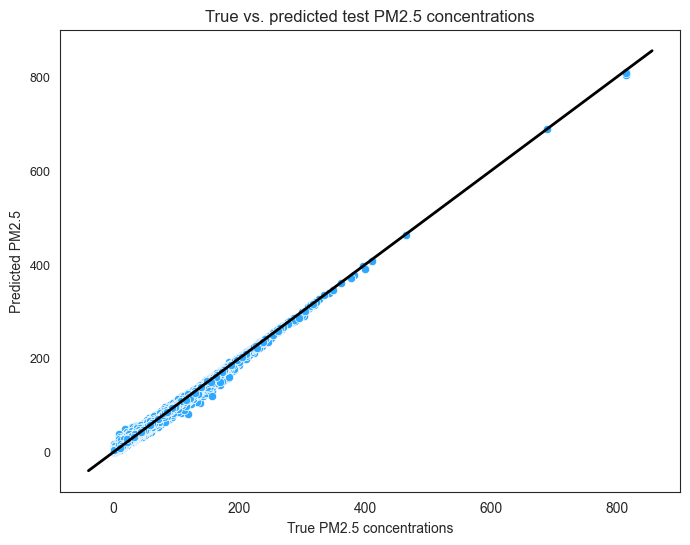

In [179]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
sns.scatterplot(x=y_train, y=y_train_predicted, color = "#2fa8ffff", edgecolor = "white")
xmin, xmax = plt.xlim() # Get the x-axis limits
plt.plot([xmin, xmax], [xmin, xmax], color='black', linewidth=2) #adjust color, linestyle and linewidth as needed
plt.title('True vs. predicted test PM2.5 concentrations')
plt.xlabel('True PM2.5 concentrations')
plt.ylabel('Predicted PM2.5')

In [1]:
sns.histplot(y_train)

NameError: name 'sns' is not defined

Text(0, 0.5, 'Predicted PM2.5')

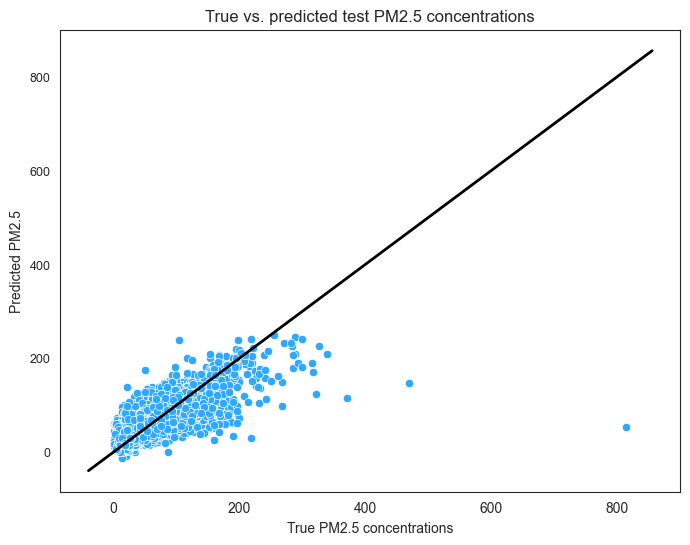

In [177]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
sns.scatterplot(x=y_test, y=y_test_predicted, color = "#2fa8ffff", edgecolor = "white")
xmin, xmax = plt.xlim() # Get the x-axis limits
plt.plot([xmin, xmax], [xmin, xmax], color='black', linewidth=2) #adjust color, linestyle and linewidth as needed
plt.title('True vs. predicted test PM2.5 concentrations')
plt.xlabel('True PM2.5 concentrations')
plt.ylabel('Predicted PM2.5')




In [96]:
param_xgbreg2 = {'xgbreg__n_estimators': [1000],
        'xgbreg__eta': [0.15], 
        'xgbreg__max_depth': [7, 10],
        'xgbreg__alpha': [0.2],
        # 'xgbreg__min_child_weight': [1, 3, 5],
        #'xgbreg__subsample': [0.6, 0.8, 1],
        #'xgbreg__colsample_bytree': [0.2, 0.6, 0.8, 1],
        #'xgbreg__gamma': [0, 0.1, 0.2, 0.3],
        #'xgbreg__scale_pos_weight': [1, 2, 3]
        }

In [183]:
y_train.describe()

# calculate IQR for column Height
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 3.0
upper_boundary = Q3 + threshold * IQR 
lower_boundary = Q1 - threshold * IQR

upper_boundary

245.0

In [99]:
from sklearn.model_selection import GridSearchCV

grid_xbreg2 = GridSearchCV(pipe_xgbreg, param_grid=param_xgbreg2, cv=5, scoring = 'neg_mean_absolute_error', verbose=5, n_jobs=-1)

grid_xbreg2.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


KeyboardInterrupt: 

In [ ]:
#try out best fit so far
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb

num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, features),
])

pipe_xgbreg = Pipeline([
    ('preprocessor', preprocessor),
    ('xgbreg', xgb.XGBRegressor(eta=0.15, alpha=0.2, gamma=0, max_depth=10, n_estimators=1000))  # only parameter that is fixed for everything, not hyperparameter to try later

])

xgb.cv(
    params=pipe_xgbreg.get_params()['xgbreg'].get_xgb_params(),
    dtrain=xgb.DMatrix(X_train, y_train),
    num_boost_round=100,
    nfold=5,
    metrics='mae',
    seed=RSEED
)


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,51.827207,0.136612,51.866737,0.614036
1,44.395383,0.121212,44.612350,0.574516
2,38.316079,0.103173,38.905264,0.534715
3,33.435922,0.087620,34.508262,0.459105
4,29.518081,0.094073,31.145584,0.418224
...,...,...,...,...
95,5.765820,0.149627,19.767629,0.360290
96,5.726874,0.146864,19.765245,0.358212
97,5.669845,0.135135,19.761814,0.351914
98,5.624335,0.144818,19.758495,0.353145


In [ ]:
import xgboost as xgb
# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

model_xgb = xgb.train(params=params, dtrain=dtrain_reg)


#('xgbreg', xgb.XGBRegressor(eta=0.015, alpha=0.2, gamma=0, max_depth=10, n_estimators=1000))  # only parameter that is fixed for everything, not hyperparameter to try later



XGBoostError: [21:12:53] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000016dbe1bc8 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000016dcc721c xgboost::gbm::GBTree::ConfigureUpdaters() + 476
  [bt] (2) 3   libxgboost.dylib                    0x000000016dcc2374 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 952
  [bt] (3) 4   libxgboost.dylib                    0x000000016dce21b4 xgboost::LearnerConfiguration::Configure() + 1124
  [bt] (4) 5   libxgboost.dylib                    0x000000016dce24cc xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x000000016dbfb418 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001ad131050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001ad139b04 ffi_call_int + 1208
  [bt] (8) 9   _ctypes.cpython-311-darwin.so       0x0000000103e739f0 _ctypes_callproc + 1288



In [ ]:
from sklearn.metrics import mean_squared_error

preds = model_xgb.predict(dtest_reg)

In [ ]:
y_test_predicted = rs.predict(X_test)

In [ ]:

rs = RandomizedSearchCV(
    estimator=pipe_xgbreg,
    param_distributions=param_xgbreg2,
    n_iter=100,
    scoring='neg_mean_absolute_error', #mape_scorer
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=RSEED
)

rs.fit(X_train, y_train)
rs.best_score_

#y_test_predicted = rs.predict(X_test)




Fitting 5 folds for each of 2 candidates, totalling 10 fits


KeyboardInterrupt: 

# plot PM2.5 across time

In [194]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'])

In [239]:
import plotly.express as px

# Create the plot
fig = px.line(df_raw, x="Date", y="target")

# Customize the x-axis
fig.update_xaxes(ticks= "outside",
                 dtick= "M1",
                 ticklabelmode= "period", 
                 tickcolor= "black", 
                 ticklen=10, 
                 minor=dict(
                     ticklen=4,  
                     dtick=7*24*60*60*1000,  
                     tick0="2016-07-03", 
                     griddash='dot', 
                     gridcolor='white', 
                     tickcolor="lightgrey")
                )

fig.update_layout({"title": 'Daily PM2.5 concentration for 340 cities across the globe',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Daily PM2.5 concentration"},
                   "showlegend": False})

# Show the plot
fig.show()


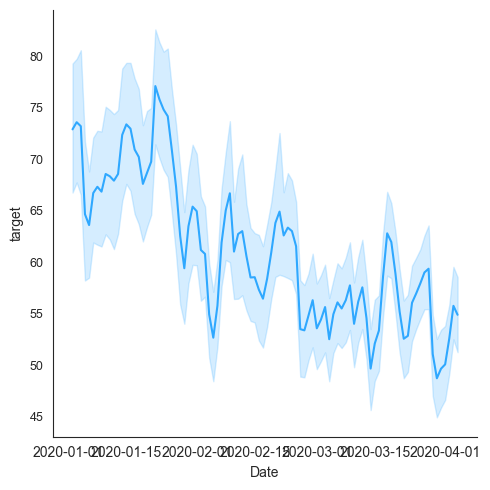

In [ ]:
sns.relplot(data=df_raw, x="Date", y="target", kind="line", color = "#2fa8ffff")

plt.show()

# Run Daniels and Julia's best model

In [65]:
params_best = {'xgbreg__reg_lambda': 10,
  'xgbreg__reg_alpha': 0,
  'xgbreg__n_estimators': 50,
  'xgbreg__max_depth': 10,
  'xgbreg__learning_rate': 0.1,
  'xgbreg__gamma': 5,
  'xgbreg__colsample_bytree': 0.8}

In [71]:
xgb_model = XGBRegressor(**params_best)

In [72]:
xgb_model.fit(X_train, y_train)

[12:02:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgbreg__colsample_bytree", "xgbreg__gamma", "xgbreg__learning_rate", "xgbreg__max_depth", "xgbreg__n_estimators", "xgbreg__reg_alpha", "xgbreg__reg_lambda" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb

num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, features),
])

pipe_xgbreg_best = Pipeline([
    ('preprocessor', preprocessor),
    ('xgbreg', xgb.XGBRegressor(**params_best))  # only parameter that is fixed for everything, not hyperparameter to try later
])

In [73]:
y_train_predict = pipe_xgbreg_best.fit(X_train, y_train)

[12:10:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "xgbreg__colsample_bytree", "xgbreg__gamma", "xgbreg__learning_rate", "xgbreg__max_depth", "xgbreg__n_estimators", "xgbreg__reg_alpha", "xgbreg__reg_lambda" } are not used.



In [76]:
y_train_predict


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['precipitable_water_entire_atmosphere',
                                                   'relative_humidity_2m_above_ground',
                                                   'specific_humidity_2m_above_ground',
                                                   'temperature_2m_above_ground',
                                                   'u_component_of_wind_10m_above_ground'...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [70]:
pipe_xgbreg_best.model_out

AttributeError: 'Pipeline' object has no attribute 'model_out'

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from sklearn.metrics import make_scorer, mean_absolute_percentage_error
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Transform target 

In [ ]:
# can we split data keeping some variable constant ... stratify? All data for same location together? 